## Bi-DW-KNN : Data Imputation for Univariate Time Series

### Loading numpy,pandas sklearn and matplotlib libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import array
import statistics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

### creating Data Frame by loading NY Temperature Sensor Data

This data set has below columns
- Timestamp
- temperature
- Dew Point
- Humidity

In [2]:
df = pd.read_csv('data\\New_York_Hourly.csv',header=0)
print(df.head)

<bound method NDFrame.head of              DateTime  Temperature  DewPoint  Humidity
0       1/1/2016 0:00         42.1      25.0        51
1       1/1/2016 1:00         41.0      25.0        53
2       1/1/2016 2:00         41.0      26.1        55
3       1/1/2016 3:00         41.0      26.1        55
4       1/1/2016 4:00         39.9      26.1        58
...               ...          ...       ...       ...
5136  6/30/2016 19:00         78.1      60.1        54
5137   7/1/2016 20:00         77.0      61.0        58
5138   7/1/2016 21:00         75.9      61.0        60
5139   7/1/2016 22:00         75.9      61.0        60
5140   7/1/2016 23:00         75.9      60.1        58

[5141 rows x 4 columns]>


*note : Considering the capacity of my machine, we considered 500 observations of the dataset.*

In [3]:
df = df[:500]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     500 non-null    object 
 1   Temperature  500 non-null    float64
 2   DewPoint     500 non-null    float64
 3   Humidity     500 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
#print(df['Hour'])
#print(df['VHT'])
#plt.plot(df['Hour'],df['VHT'],color='red',marker='o',markerfacecolor='blue')
#plt.xlabel("Time")
#plt.ylabel("VHT (Veh-Hours)")

**Trying to understand the nature of the data by ploting sensor data against timestamp**
<br>
**Here X-axis is timestamp and Y-axis is Temperature collected from NY Temperature sensor**

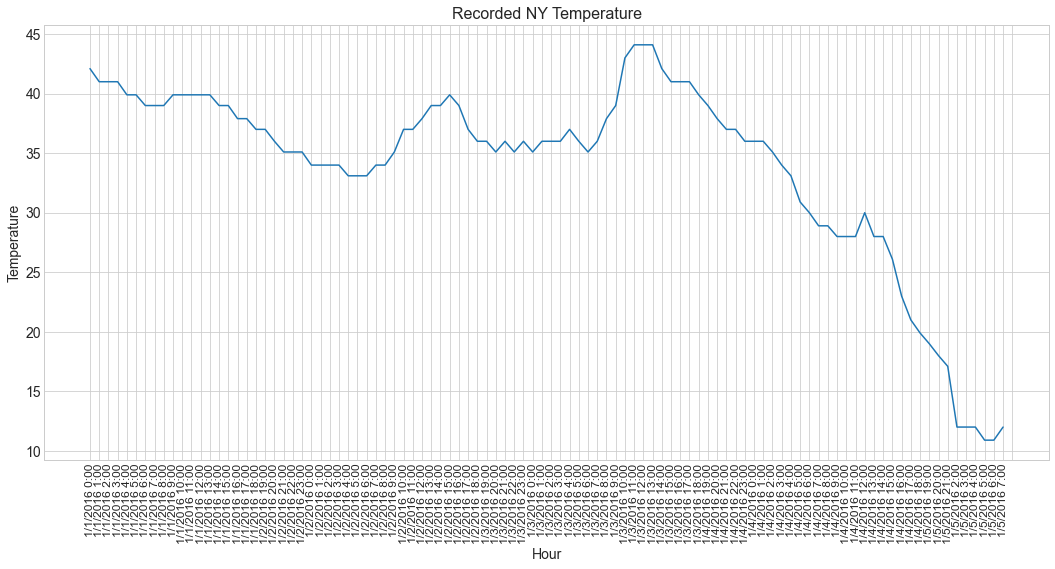

In [6]:
df_graph = df[:100]
plt.figure(figsize=(18, 8))
plt.plot(df_graph.DateTime, df_graph['Temperature'])
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df_graph.DateTime)+1, 1), rotation=90, fontsize=12)
plt.yticks(fontsize=14)
plt.title("Recorded NY Temperature", fontsize=16)
plt.show()

#### Defining the parameters before applying KNN alorithms
- Window size is defined in window variable
- neighbor of KNN algorithm is defined in knn_neighbors variable

In [7]:
window = 48
window_start_index = 0
knn_neighbors = 15
N = len(df)
print('Data Length:',N)

a_list = list(range(1, N+1))
#print(a_list)

Data Length: 500


#### Nullifying some of the data elements, so that we can compute the values using below algorithms.
- Bi-SW-KNN
- KNN
- Simple Imputer

In [8]:
Before_imputation = df
missing_val_locations = [58,82]
missing_val = []

for x in missing_val_locations:
    print('Try to impute this value:',Before_imputation.iloc[x,1])
    missing_val.append(Before_imputation.iloc[x,1])
    Before_imputation.iloc[x,1] = np.nan;
Before_imputation.DateTime=a_list

print(Before_imputation)

Try to impute this value: 43.0
Try to impute this value: 28.0
     DateTime  Temperature  DewPoint  Humidity
0           1         42.1      25.0        51
1           2         41.0      25.0        53
2           3         41.0      26.1        55
3           4         41.0      26.1        55
4           5         39.9      26.1        58
..        ...          ...       ...       ...
495       496         17.1       1.0        50
496       497         17.1       1.0        50
497       498         17.1       1.0        50
498       499         16.0       1.0        52
499       500         16.0       1.0        52

[500 rows x 4 columns]


### Below is the Algorithm of our proposed method Bi-SW-KNN
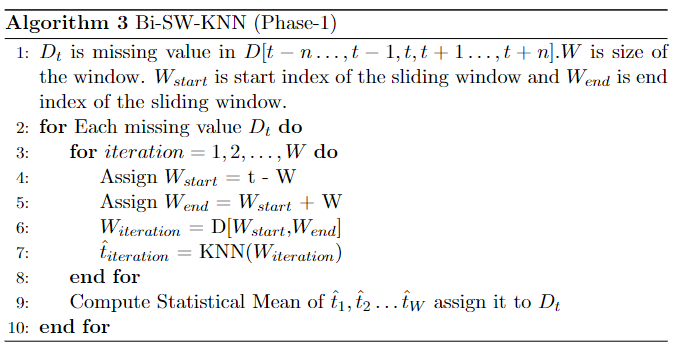

In [9]:
imputer = KNNImputer(n_neighbors=knn_neighbors)
counter = 0
biSWknn_imputed_vals = []
for missing_val_loc in missing_val_locations:
    print('missing_val_loc', missing_val_loc)
    print('Try to impute this value:',missing_val[counter])
    list_imputed_vals = []
    for i in range(0, window):
        start_index = missing_val_loc - (window - 1)+i
        end_index = start_index + window
        missing_val_index = end_index-(start_index+1+i)
        #print('start index', start_index)
        #print('end index', end_index)
        working_data = Before_imputation[start_index : end_index]
        #print('working_data',working_data)
        #print('Try to impute this value:',working_data.iloc[missing_val_loc-i,1])
        After_imputation = imputer.fit_transform(working_data)
        # print dataset after performing the operation
        #print("\n\nAfter performing imputation\n",After_imputation)
        #print("\n1------------",missing_val_loc-i)
        #print("\n2------------",missing_val_index)
        #print('Try to impute this value:',After_imputation[missing_val_loc-i,1])
        #print('After impute this value:',After_imputation[missing_val_index,1])
        list_imputed_vals.append(After_imputation[missing_val_index,1])
    counter = counter + 1;
    #print('list of possible values',list_imputed_vals)  
    print('Mean of data-set is : ',statistics.mean(list_imputed_vals))
    biSWknn_imputed_vals.append(statistics.mean(list_imputed_vals))
    #print('Median of data-set is : ',statistics.median(list_imputed_vals))

missing_val_loc 58
Try to impute this value: 43.0
Mean of data-set is :  39.545138888888886
missing_val_loc 82
Try to impute this value: 28.0
Mean of data-set is :  26.56763888888889


### Regression accuracy metrics

   The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.
   
- MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
- MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
- RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
- R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [10]:
print('Actual values:',missing_val)
print('Predicted values:',biSWknn_imputed_vals)

r2 = r2_score(missing_val,biSWknn_imputed_vals)
print('R2 score of sliding window bi-direction KNN:',r2)

rmse = mean_squared_error(missing_val, biSWknn_imputed_vals, squared=False)
print('RMSE score of sliding window bi-direction KNN:',rmse)

mae = mean_absolute_error(missing_val, biSWknn_imputed_vals)
print('MAE score of sliding window bi-direction KNN:',mae)

Actual values: [43.0, 28.0]
Predicted values: [39.545138888888886, 26.56763888888889]
R2 score of sliding window bi-direction KNN: 0.87566467866941
RMSE score of sliding window bi-direction KNN: 2.644591050587158
MAE score of sliding window bi-direction KNN: 2.443611111111112


In [11]:
imputer = KNNImputer(n_neighbors=knn_neighbors)
knn_imputed_vals = []
After_imputation = imputer.fit_transform(Before_imputation)
 # print dataset after performing the operation
for missing_val_loc in missing_val_locations:
    print("After performing imputation\n",After_imputation[missing_val_loc,1])
    knn_imputed_vals.append(After_imputation[missing_val_loc,1])

After performing imputation
 39.88
After performing imputation
 25.72666666666667


In [12]:
print('Actual values:',missing_val)
print('Predicted values:',knn_imputed_vals)

r2 = r2_score(missing_val,knn_imputed_vals)
print('R2 score of KNNImputer:',r2)

rmse = mean_squared_error(missing_val, knn_imputed_vals, squared=False)
print('RMSE score of KNNImputer:',rmse)

mae = mean_absolute_error(missing_val, knn_imputed_vals)
print('MAE score of KNNImputer:',mae)

Actual values: [43.0, 28.0]
Predicted values: [39.88, 25.72666666666667]
R2 score of KNNImputer: 0.8675338271604941
RMSE score of KNNImputer: 2.7296926973969446
MAE score of KNNImputer: 2.6966666666666637


In [13]:
sim_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
sim_imputed_vals = []
After_sim_imputation = sim_imputer.fit_transform(Before_imputation)
 # print dataset after performing the operation
for missing_val_loc in missing_val_locations:
    print("After performing imputation\n",After_sim_imputation[missing_val_loc,1])
    sim_imputed_vals.append(After_sim_imputation[missing_val_loc,1])

After performing imputation
 36.32991967871486
After performing imputation
 36.32991967871486


In [14]:
print('Actual values:',missing_val)
print('Predicted values:',sim_imputed_vals)

r2 = r2_score(missing_val,sim_imputed_vals)
print('R2 score of SimpleImputer:',r2)

rmse = mean_squared_error(missing_val, sim_imputed_vals, squared=False)
print('RMSE score of SimpleImputer:',rmse)

mae = mean_absolute_error(missing_val, sim_imputed_vals)
print('MAE score of SimpleImputer:',mae)

Actual values: [43.0, 28.0]
Predicted values: [36.32991967871486, 36.32991967871486]
R2 score of SimpleImputer: -0.012244740855434255
RMSE score of SimpleImputer: 7.545778069431819
MAE score of SimpleImputer: 7.5


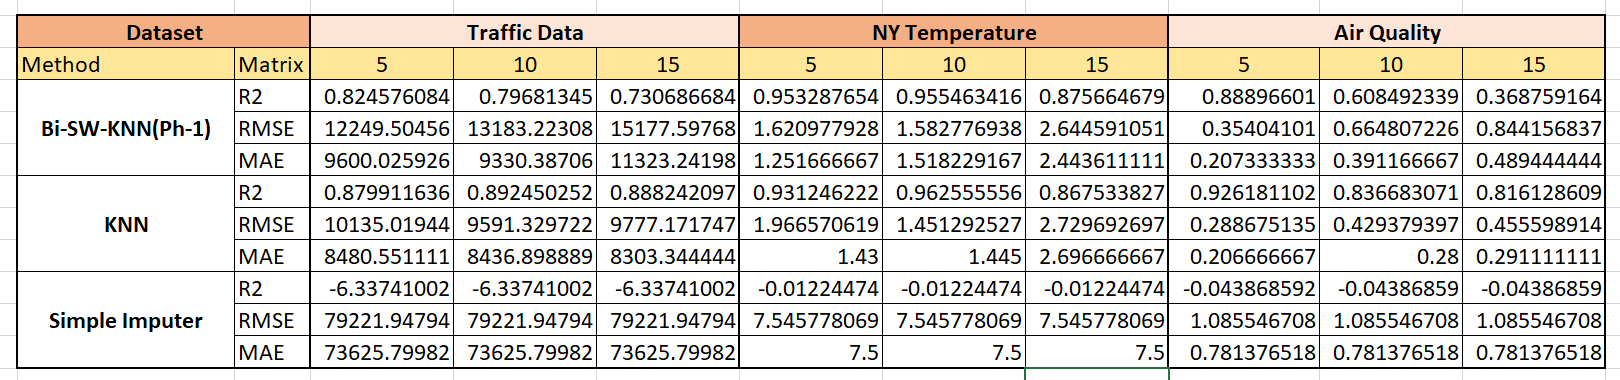